In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
#import pandas_profiling
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import nltk
# nltk.download()
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import PorterStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import matplotlib.animation as animation
import operator
import plotly.express as px
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer as TFID

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
df = pd.read_csv("/content/drive/MyDrive/My_Projects/LAB_BASED_PROJECT2023/Dataset/En_Hasoc21_train.csv")
df.describe()


,Unnamed: 0
count,3843.000000
mean,2558.799375
std,1477.088070
min,1.000000
25%,1276.500000
50%,2574.000000
75%,3828.000000
max,5121.000000


In [4]:
df.head()

,Unnamed: 0,_id,text,task_1,task_2
0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN
1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN
2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE
3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN
4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN


In [5]:
df.columns = ['no_name','id','original_text','task1','task2']

In [6]:
df.head()

,no_name,id,original_text,task1,task2
0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN
1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN
2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE
3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN
4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN


In [7]:
def wordcloud_vis(column):
  mostcommon = nltk.FreqDist(df[column]).most_common(100)
  wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(str(mostcommon))
  fig = plt.figure(figsize=(30,10), facecolor='white')
  plt.imshow(wordcloud) #, interpolation="bilinear")
  plt.axis('off')
  plt.show()


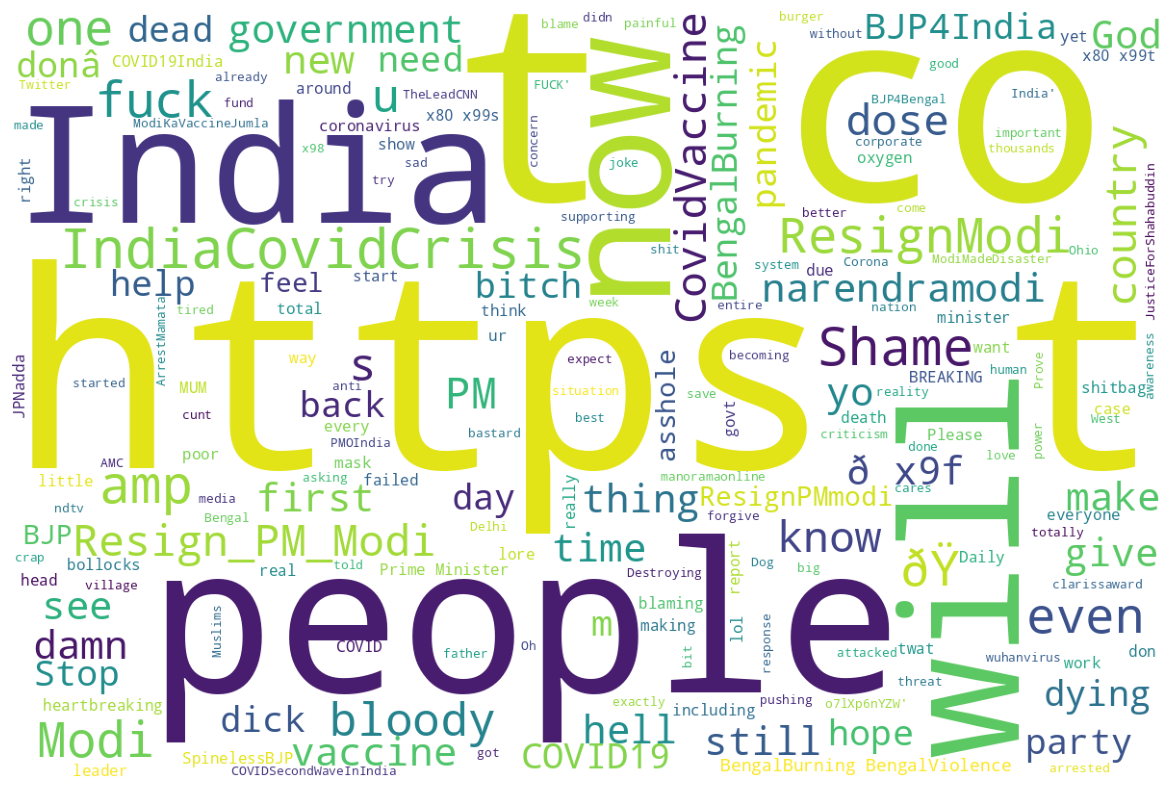

In [8]:
#Plot the word-cloud before removing stopwords, performing lemmatization
wordcloud_vis('original_text')

In [9]:
#Retain only the letters and spaces
df['clean_text'] = df['original_text'].apply(lambda x: re.sub(r'[^a-zA-Z ]+', '', x.lower()))
df.head()

,no_name,id,original_text,task1,task2,clean_text
0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN,wealth if you made it through this ampamp were...
1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN,technically thats still turning back the clock...
2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE,vmbjp bjpbengal bjpindia narendramodi jpnadda ...
3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN,krtoprakyigit soldier of japan who has dick head
4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN,blueheartedly youd be better off asking who do...


In [10]:
def wordcloud_vis(column):
  mostcommon = nltk.FreqDist(df[column]).most_common(100)
  wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(str(mostcommon))
  fig = plt.figure(figsize=(30,10), facecolor='white')
  plt.imshow(wordcloud) #, interpolation="bilinear")
  plt.axis('off')
  plt.show()


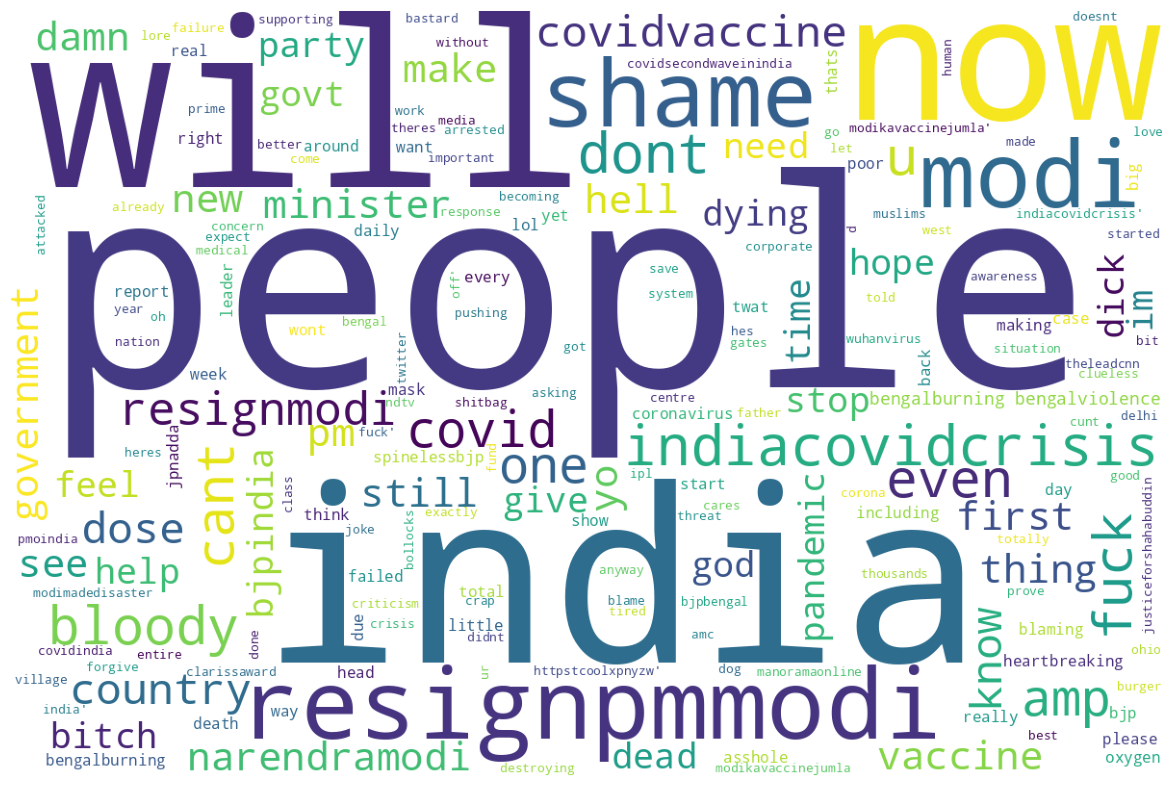

In [11]:
#Plot the word-cloud before removing stopwords, performing lemmatization
wordcloud_vis('clean_text')

In [12]:
import nltk
nltk.download('stopwords')
df['clean_text'] = df['clean_text'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
df.head()

,no_name,id,original_text,task1,task2,clean_text
0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN,wealth made ampamp able start making money sus...
1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN,technically thats still turning back clock dic...
2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE,vmbjp bjpbengal bjpindia narendramodi jpnadda ...
3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN,krtoprakyigit soldier japan dick head
4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN,blueheartedly youd better asking doesnt think ...


In [14]:
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later','kul':'cool','fyn':'fine','omg':'oh my god','fam':'family','bruh':'brother',
    'cud':'could','fud':'food','govt':'government'}
df['clean_text'] = df['clean_text'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))


###tokenize the data

In [15]:
def tokenize(data):
  generated_token = list(data.split())
  return generated_token
df['tokenized_data'] = df['clean_text'].apply(lambda x: tokenize(x))
df.head()


,no_name,id,original_text,task1,task2,clean_text,tokenized_data
0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN,wealth made ampamp able start making money sus...,"[wealth, made, ampamp, able, start, making, mo..."
1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN,technically thats still turning back clock dic...,"[technically, thats, still, turning, back, clo..."
2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE,vmbjp bjpbengal bjpindia narendramodi jpnadda ...,"[vmbjp, bjpbengal, bjpindia, narendramodi, jpn..."
3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN,krtoprakyigit soldier japan dick head,"[krtoprakyigit, soldier, japan, dick, head]"
4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN,blueheartedly youd better asking doesnt think ...,"[blueheartedly, youd, better, asking, doesnt, ..."


In [16]:
sum = 0
for i in df['tokenized_data']:
  sum += len(i)
sum/df.shape[0]


15.098360655737705

In [17]:
#Now apply lemmatization to reduce the data to its base form
ps = nltk.PorterStemmer()
def stemming(list_of_words):
  stemmed_list = [ps.stem(word) for word in list_of_words]
  return stemmed_list
df['stemmed_words'] = df['tokenized_data'].apply(lambda x: stemming(x))
df.head()
# lemmatizer = WordNetLemmatizer()
# df['lemmatized_text'] = df['clean_text'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


,no_name,id,original_text,task1,task2,clean_text,tokenized_data,stemmed_words
0,4986,60c5d6bf5659ea5e55defa2c,@wealth if you made it through this &amp;&amp;...,HOF,PRFN,wealth made ampamp able start making money sus...,"[wealth, made, ampamp, able, start, making, mo...","[wealth, made, ampamp, abl, start, make, money..."
1,3394,60c5d6bf5659ea5e55def461,Technically that's still turning back the cloc...,HOF,OFFN,technically thats still turning back clock dic...,"[technically, thats, still, turning, back, clo...","[technic, that, still, turn, back, clock, dick..."
2,1310,60c5d6bf5659ea5e55defaad,@VMBJP @BJP4Bengal @BJP4India @narendramodi @J...,NOT,NONE,vmbjp bjpbengal bjpindia narendramodi jpnadda ...,"[vmbjp, bjpbengal, bjpindia, narendramodi, jpn...","[vmbjp, bjpbengal, bjpindia, narendramodi, jpn..."
3,3390,60c5d6bf5659ea5e55def419,@krtoprak_yigit Soldier of Japan Who has dick ...,HOF,OFFN,krtoprakyigit soldier japan dick head,"[krtoprakyigit, soldier, japan, dick, head]","[krtoprakyigit, soldier, japan, dick, head]"
4,4626,60c5d6bf5659ea5e55def7fa,@blueheartedly You'd be better off asking who ...,HOF,OFFN,blueheartedly youd better asking doesnt think ...,"[blueheartedly, youd, better, asking, doesnt, ...","[blueheartedli, youd, better, ask, doesnt, thi..."


In [18]:
df['stemmed_sentences'] = df['stemmed_words'].apply(lambda x: ' '.join(x))

In [19]:
from sklearn.model_selection import train_test_split
task1_labels = df['task1']
xtrain, xtest, ytrain, ytest = train_test_split(df['stemmed_sentences'],task1_labels,test_size =0.2,stratify=task1_labels,random_state=42)


In [20]:
print(task1_labels)

0       HOF
1       HOF
2       NOT
3       HOF
4       HOF
       ... 
3838    HOF
3839    HOF
3840    HOF
3841    HOF
3842    NOT
Name: task1, Length: 3843, dtype: object


In [21]:
# df['stemmed_sentences'] = df['original_text']
#Now let's vectorize the data
tfidf_vectorizer = TFID(use_idf=True,max_features=5000)
train_vecs=tfidf_vectorizer.fit_transform(xtrain)

In [22]:
tfidf_vectorizer

TfidfVectorizer(max_features=5000)

In [23]:
ttdf = pd.DataFrame(data=df['stemmed_sentences'])
ttdf.head()

,stemmed_sentences
0,wealth made ampamp abl start make money sustai...
1,technic that still turn back clock dick head h...
2,vmbjp bjpbengal bjpindia narendramodi jpnadda ...
3,krtoprakyigit soldier japan dick head
4,blueheartedli youd better ask doesnt think he ...


##RNN

In [24]:
import tensorflow as tf
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 35000
# Max number of words in each message.
MAX_SEQUENCE_LENGTH = 50
# This is fixed.
EMBEDDING_DIM = 110
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(ttdf['stemmed_sentences'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 12144 unique tokens.


In [25]:
X = tokenizer.texts_to_sequences(df['stemmed_sentences'].values)
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (3843, 50)


In [26]:
X

array([[    0,     0,     0, ...,   176,     2,   208],
       [    0,     0,     0, ...,    52,    68,  4012],
       [    0,     0,     0, ...,     2,    56,    15],
       ...,
       [    0,     0,     0, ...,   157,  3577,    21],
       [    0,     0,     0, ...,    37,    99, 12142],
       [    0,     0,     0, ...,   235,    57,   135]], dtype=int32)

In [27]:
Y = pd.get_dummies(df['task1']).values

In [28]:
Y

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [29]:
from sklearn.model_selection import train_test_split
nxtrain, nxtest, nytrain, nytest = train_test_split(X,Y,test_size =0.3,stratify=Y,random_state=42)

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Embedding


In [31]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(units = 40))
model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))


In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
# Train the model on the training data
model.fit(nxtrain, nytrain, batch_size=64, epochs=10, verbose=1,validation_split = 0.1)

Epoch 1/10
38/38 [==============================] - 7s 113ms/step - loss: 0.6460 - accuracy: 0.6522 - val_loss: 0.6371 - val_accuracy: 0.6171
Epoch 2/10
38/38 [==============================] - 5s 126ms/step - loss: 0.5503 - accuracy: 0.7175 - val_loss: 0.5576 - val_accuracy: 0.7509
Epoch 3/10
38/38 [==============================] - 5s 133ms/step - loss: 0.3385 - accuracy: 0.8856 - val_loss: 0.6458 - val_accuracy: 0.7175
Epoch 4/10
38/38 [==============================] - 6s 159ms/step - loss: 0.1774 - accuracy: 0.9467 - val_loss: 0.6903 - val_accuracy: 0.7063
Epoch 5/10
38/38 [==============================] - 6s 161ms/step - loss: 0.0904 - accuracy: 0.9793 - val_loss: 0.8408 - val_accuracy: 0.7026
Epoch 6/10
38/38 [==============================] - 6s 159ms/step - loss: 0.0525 - accuracy: 0.9893 - val_loss: 0.7363 - val_accuracy: 0.7249
Epoch 7/10
38/38 [==============================] - 8s 199ms/step - loss: 0.0424 - accuracy: 0.9917 - val_loss: 1.1343 - val_accuracy: 0.7138
Epoch 

In [34]:
# Evaluate the model on the testing data
loss, accuracy = model.evaluate(nxtest, nytest, verbose=0)
print(f"Accuracy: {accuracy}")
print(f"loss: {loss}")

Accuracy: 0.7458803057670593
loss: 0.9514303207397461


##Random Forest Algorithims

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# Create a random forest regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [36]:
# Fit the model to the training data
rf.fit(nxtrain, nytrain)

RandomForestRegressor(random_state=42)

In [37]:
# Predict using the trained model
y_pred = rf.predict(nxtest)

In [38]:
from sklearn import metrics

print('Mean absolute error:', metrics.mean_absolute_error(nytest,y_pred ))
print('Mean square error :', metrics.mean_squared_error(nytest,y_pred))
print('Root Mean square error:', np.sqrt(metrics.mean_squared_error(nytest,y_pred)))

Mean absolute error: 0.413376698467765
Mean square error : 0.21674031454177534
Root Mean square error: 0.4655537719123059


## Linear Regression algorithims

In [39]:
from sklearn.linear_model import LinearRegression
# Create a linear regression model
model = LinearRegression()
# Fit the model to the training data
model.fit(nxtrain, nytrain)


LinearRegression()

In [40]:
y_pred = model.predict(nxtest)

In [41]:
from sklearn import metrics

print('Mean absolute error:', metrics.mean_absolute_error(nytest,y_pred ))
print('Mean square error :', metrics.mean_squared_error(nytest,y_pred))
print('Root Mean square error:', np.sqrt(metrics.mean_squared_error(nytest,y_pred)))

Mean absolute error: 6977901543.201057
Mean square error : 5.553909228394229e+22
Root Mean square error: 235667333934.8122
